<a href="https://colab.research.google.com/github/VeronikaLoiko/EDA-project/blob/main/EDA(spotify_songs_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis (EDA) based on Spotify Tracks Dataset**

The objective of this project is to conduct EDA (Exploratory Data Analysis)

---

based on the "Spotify Tracks" dataset from Kaggle. The main goal is to analyze factors influencing the popularity of songs based on numerical parameters provided in the dataset columns.

# Importing Required Libraries and load our dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
song_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset.csv')

#  Reading Dataset

Further methods are essential for data exploration, understanding the structure and characteristics of data.

In [4]:
song_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [6]:
song_df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


The .describe() method in pandas is used to generate descriptive statistics of the numerical columns in a DataFrame. It provides summary statistics such as count, mean, standard deviation, minimum, maximum, and quartile values for each numeric column.

The distribution of the "popularity" column. Here's a detailed description:

*  **Count**: There are 114,000 non-null values in the "popularity" column. This indicates a large dataset with no missing values for this attribute.

*  **Mean**: The average popularity is 33.24. Given that popularity ranges from 0 to 100, a mean of 33.24 suggests that the overall popularity tends to be on the lower side. This implies a large number of songs are unpopular.

*  **Standard Deviation (std)**: The standard deviation is 22.31. This measures the spread of the popularity scores around the mean. A standard deviation of 22.31 is relatively high, indicating that the popularity scores are widely spread out from the mean.

*  **Minimum (min)**: The smallest popularity score is 0, meaning there are songs with no popularity at all.

*  **50th Percentile (Median or Q2**): The median popularity score is 35. This indicates that half of the songs have a popularity score of 35 or less, reinforcing the observation that many songs have low popularity.

---
*Additional Insights:*
*  **Skewness:** The distribution is likely to be right-skewed (positively skewed) since the mean (33.24) is less than the median (35). This skewness indicates that there are a few highly popular songs pulling the mean upwards.

*  **Interquartile Range (IQR)**:  The IQR is Q3 - Q1, which is 50 - 17 = 33. This range shows the middle 50% of the popularity scores are spread over 33 units, indicating moderate dispersion within this central range.
---


In summary, the "popularity" column shows a distribution where most songs are not very popular, with a small number of songs achieving high popularity. The data is spread out with a notable skew towards higher popularity due to a few popular songs. The quartiles indicate that the bulk of the songs have relatively low popularity scores.

In [7]:
song_df.shape

(114000, 21)

Retrieve the shape of the DataFrame song_df. This information helps us understand the size and structure of our DataFrame

#Data preprocessing

### deleting the 'Unnamed' column


After reading the song_df, an unnecessary column named "Unnamed" can be noticed. Such columns are typically automatically generated during reading or parsing of data and do not provide any meaningful information for further analysis. Thus, they can be dropped from the DataFrame.

In [8]:
song_df.drop(columns=[song_df.columns[0]], inplace=True)
song_df.info()  #delete the first 'unnamed' column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

### deleting a zero-duration song

Deleting songs with duration_ms = 0 is essential for ensuring the quality of data analysis. A duration of 0 milliseconds indicates either missing or erroneous data, which can significantly skew analytical results. By removing these erroneous rows, we maintain data integrity and accuracy in our analysis.

In [9]:
song_df[song_df['duration_ms'] == 0]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [10]:
song_df.drop(song_df[song_df['duration_ms'] == 0].index, inplace=True) #delete a song with 'duration_ms' = 0 and the changes are applied directly to the original song_df. This means that the song_df is modified in place

### Dealing with dublicates

Removing duplicates enhances the quality, reliability, and efficiency of data analysis processes, ultimately leading to more accurate and meaningful insights.

In [11]:
song_df.duplicated().sum()

450

In [12]:
song_df[song_df.duplicated()] # this code shows duplicated rows

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
3738,7mULVp0DJrI2Nd6GesLvxn,Joy Division,Timeless Rock Hits,Love Will Tear Us Apart,0,204621,False,0.524,0.902,2,-8.662,1,0.0368,0.000989,0.695000,0.1370,0.907,146.833,4,alternative
4648,6d3RIvHfVkoOtW1WHXmbX3,Little Symphony,Serenity,Margot,27,45714,False,0.269,0.142,0,-23.695,1,0.0509,0.866000,0.904000,0.1140,0.321,67.872,3,ambient
5769,481beimUiUnMUzSbOAFcUT,SUPER BEAVER,突破口 / 自慢になりたい,突破口,54,255080,False,0.472,0.994,8,-1.786,1,0.1140,0.025900,0.000000,0.0535,0.262,103.512,4,anime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111246,0sSjIvTvd6fUSZZ5rnTPDW,Everything But The Girl,Eden (Deluxe Edition),Another Bridge - 2012 Remaster,26,132826,False,0.480,0.853,0,-6.276,1,0.0734,0.030600,0.000001,0.3200,0.775,85.181,4,trip-hop
111362,2zg3iJW4fK7KZgHOvJU67z,Faithless,Faithless 2.0,Tarantula,21,398152,False,0.622,0.816,6,-11.095,0,0.0483,0.009590,0.578000,0.0991,0.427,136.007,4,trip-hop
111980,46FPub2Fewe7XrgM0smTYI,Morcheeba,Parts of the Process,Undress Me Now,17,203773,False,0.576,0.352,7,-10.773,0,0.0268,0.700000,0.270000,0.1600,0.360,95.484,4,trip-hop
112968,6qVA1MqDrDKfk9144bhoKp,Acil Servis,Küçük Adam,Bebek,38,319933,False,0.486,0.485,5,-12.391,0,0.0331,0.004460,0.000017,0.3690,0.353,120.095,4,turkish


In [13]:
song_df.drop_duplicates(inplace = True)

In [14]:
song_df.reset_index(drop = True, inplace = True) #as we`ve dropped duplicated rows, indexes are not consistent. Therefore we have to reset indices.

In [15]:
song_df[song_df.duplicated()]   # check again for duplicates

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [16]:
song_df   #now, check song_df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113544,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113545,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113546,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113547,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


### Finding and getting rid of missing values

Removing missing values ensures that the data used for analysis is complete and accurate, thereby increasing the validity and reliability of the results. This leads to more accurate and meaningful conclusions that contribute to better decision-making.

In [17]:
song_df.isna().sum() # check every column for NaN values

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

# Popularity of songs, anomalies, exploration

*In short, visualization is crucial in EDA because it helps us explore data, come up with ideas, share discoveries, check data quality and make decisions. It makes data easier to understand, leading to better analyses and smarter choices.*

 one of many other ways to visualize data is using historgams. In general, histograms provide a visual representation of the distribution of data values in a data set. They allow you to quickly understand the shape, center, spread, and skewness of the data.

In [18]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)         #These lines of code are setting display options for pandas DataFrame outputs.

<Axes: xlabel='popularity', ylabel='Count'>

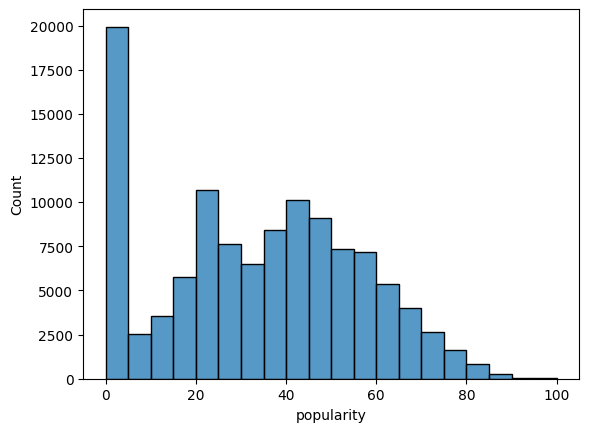

In [19]:
sns.histplot(data = song_df, x = 'popularity', bins = 20)

Here the histogram helped to identify anomalies in the data distribution and in dataset as well. Abnormal spike at 0-popularity bar. Lets discover why?

In [20]:
song_df[song_df['popularity']==0]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
23,0BUuuEvNa5T4lMaewyiudB,Jason Mraz,Coffee Moment,93 Million Miles,0,216386,False,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,4,acoustic
24,3Hn3LfhrQOaKihdCibJsTs,Jason Mraz,Human - Best Adult Pop Tunes,Unlonely,0,231266,False,0.796,0.667,5,-4.831,0,0.0392,0.3810,0.000000,0.2210,0.754,97.988,4,acoustic
26,5IfCZDRXZrqZSm8AwE44PG,Jason Mraz,Holly Jolly Christmas,Winter Wonderland,0,131760,False,0.620,0.309,5,-9.209,1,0.0495,0.7880,0.000000,0.1460,0.664,145.363,4,acoustic
27,0dzKBptH2P5j5a0MifBMwM,Jason Mraz,Feeling Good - Adult Pop Favorites,If It Kills Me,0,273653,False,0.633,0.429,4,-6.784,0,0.0381,0.0444,0.000000,0.1320,0.520,143.793,4,acoustic
28,5QAMZTM5cmLg3fHX9ZbTZi,Jason Mraz,Christmas Time,Winter Wonderland,0,131760,False,0.620,0.309,5,-9.209,1,0.0495,0.7880,0.000000,0.1460,0.664,145.363,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112596,3W73vndiqDkaYwYjSMaSWu,Rend Collective,Santa's Christmas List,Ding Dong Merrily On High (The Celebration's S...,0,117226,False,0.696,0.715,7,-7.741,1,0.0314,0.3400,0.000000,0.1800,0.959,130.021,4,world-music
112597,18FIFh4AGPC2zDLLFkJp4j,Kim Walker-Smith,Santa's Christmas List,Rudolph The Red-Nosed Reindeer,0,175426,False,0.581,0.436,8,-7.936,1,0.0443,0.2320,0.000000,0.0547,0.412,120.138,4,world-music
112598,6xw4sP2mGqAtVYZkBojxcI,Kim Walker-Smith,Santa's Christmas List,I'll Be Home For Christmas,0,193653,False,0.413,0.437,1,-7.983,0,0.0327,0.0420,0.000036,0.1460,0.102,120.259,4,world-music
112599,6E7Ix5jkd6uzfoxuvcI8Ww,Rend Collective;We The Kingdom,Santa's Christmas List,God Rest Ye Merry Gentlemen (Hallelujah),0,217120,False,0.607,0.884,2,-4.059,1,0.0489,0.0230,0.000000,0.2260,0.555,139.988,4,world-music


So there are 15843 songs with 0 popularity.

I will check which artist has the most songs with zero-popularity

In [21]:
singer_zero_popularity_count = song_df[song_df['popularity'] == 0].groupby('artists')['track_name'].count()

singer_zero_popularity_count = pd.DataFrame(singer_zero_popularity_count).sort_values(by='track_name', ascending=False)

singer_zero_popularity_count.head(15)

,track_name
artists,
Stevie Wonder,214
Ella Fitzgerald,200
Chuck Berry,157
The Beach Boys,136
Norah Jones,130
Bryan Adams,114
Dean Martin,100
Nat King Cole,97
Peggy Lee,80


As it can be noticed a world-wide popular group 'OneRepublic' is somehow in top-15 artists with the largest number of zero-popularity songs. This requires an exploration and explanation.

## OneRepublic case

In [22]:
song_df[(song_df['artists'] == 'OneRepublic')].head(25)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
78678,4h9wh7iOZ0GGn8QVp4RAOB,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,I Ain't Worried,96,148485,False,0.704,0.797,0,-5.927,1,0.0475,0.0826,0.000745,0.0546,0.825,139.994,4,piano
78680,2tpWsVSb9UEmDRxAl1zhX1,OneRepublic,Native,Counting Stars,83,257266,False,0.664,0.705,1,-4.972,0,0.0382,0.0654,0.000000,0.1180,0.477,122.016,4,piano
78681,3ro6Oub0I05PiAxcZFKaTY,OneRepublic,Arbeitsmusik Herbst/Winter 2022/2023,I Ain't Worried,0,148485,False,0.704,0.797,0,-5.927,1,0.0475,0.0826,0.000745,0.0546,0.825,139.994,4,piano
78682,1iSyH8ek7Eqc8UWOReZaqg,OneRepublic,TickTok Back To School 2022,I Ain't Worried,1,148485,False,0.704,0.797,0,-5.927,1,0.0475,0.0826,0.000745,0.0546,0.825,139.994,4,piano
78683,6v2ngdpwmKNqoojSbkmYQ6,OneRepublic,Frühstücksmusik Herbst/Winter 2022/2023,I Ain't Worried,0,148485,False,0.704,0.797,0,-5.927,1,0.0475,0.0826,0.000745,0.0546,0.825,139.994,4,piano
78684,4LUwZxtF980YhwrvxtTeZ7,OneRepublic,HOT PARTY BACK TO SCHOOL 2022,I Ain't Worried,1,148485,False,0.704,0.797,0,-5.927,1,0.0475,0.0826,0.000745,0.0546,0.825,139.994,4,piano
78685,7EKylE34yNJV97yIYgwwTl,OneRepublic,TickTok Back To School 2022,I Ain't Worried,2,148485,False,0.704,0.797,0,-5.927,1,0.0475,0.0826,0.000745,0.0546,0.825,139.994,4,piano
78686,2hReXQtxmJVC1e68rvpAFY,OneRepublic,Arbeitsmusik Herbst/Winter 2022/2023,West Coast,0,192947,False,0.685,0.699,6,-7.803,0,0.0349,0.3170,0.000000,0.0895,0.884,134.057,4,piano
78687,0VBe5Wi5e0Gc3BD1MIos0i,OneRepublic,Sunny Mornings,Sunshine,1,163854,False,0.697,0.875,5,-4.621,1,0.0340,0.1370,0.000000,0.2800,0.774,140.069,4,piano
78688,07WYO7Aayv3woZrmGeXbwT,OneRepublic,Mirando las nubes,Good Life,3,255693,True,0.636,0.708,6,-7.057,1,0.0512,0.0818,0.000000,0.1170,0.662,94.987,4,piano


the problem may be that the same song is in different albums, and the numerical characteristics are different even though they refer to the same song. So a solution can be grouping by track_name

Also I came up with an idea to create dummy variables as this can be handy in futher exploration. In dataset there are songs with one name, (almost)identical numeric charasteristics but they can be refered to different genres.

In [23]:
song_df[song_df['track_name'] == 'Counting Stars']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
78680,2tpWsVSb9UEmDRxAl1zhX1,OneRepublic,Native,Counting Stars,83,257266,False,0.664,0.705,1,-4.972,0,0.0382,0.0654,0.0,0.118,0.477,122.016,4,piano
78693,4KX7jXWbf6SivrmBHMuDuj,OneRepublic,Отново на училище,Counting Stars,4,256760,False,0.659,0.741,1,-4.354,0,0.0388,0.0720,0.0,0.166,0.454,122.013,4,piano
78715,0vB1pgTJie4BLnE5Dl0lJO,OneRepublic,Almorzando solo,Counting Stars,0,256760,False,0.659,0.741,1,-4.354,0,0.0388,0.0720,0.0,0.166,0.454,122.013,4,piano
78718,0FBywYb06nuyLdn4gBlQLb,OneRepublic,Fiesta de disfraces vol. II,Counting Stars,0,256760,False,0.659,0.741,1,-4.354,0,0.0388,0.0720,0.0,0.166,0.454,122.013,4,piano
78750,6sy3LkhNFjJWlaeSMNwQ62,OneRepublic,Native,Counting Stars,78,257839,False,0.664,0.705,1,-4.972,0,0.0382,0.0654,0.0,0.115,0.477,122.017,4,piano
78764,6QvyaYlJSCW6ft7dYHNxBA,OneRepublic,Autumn Vibes 2022,Counting Stars,0,256760,False,0.659,0.741,1,-4.354,0,0.0388,0.0720,0.0,0.166,0.454,122.013,4,piano
78794,1QzFhzIOW7CyRJLpmq5CM0,OneRepublic,Native,Counting Stars,62,257386,False,0.663,0.705,1,-4.972,0,0.0385,0.0654,0.0,0.117,0.477,122.014,4,piano
81442,2tpWsVSb9UEmDRxAl1zhX1,OneRepublic,Native,Counting Stars,83,257266,False,0.664,0.705,1,-4.972,0,0.0382,0.0654,0.0,0.118,0.477,122.016,4,pop
90672,2tpWsVSb9UEmDRxAl1zhX1,OneRepublic,Native,Counting Stars,83,257266,False,0.664,0.705,1,-4.972,0,0.0382,0.0654,0.0,0.118,0.477,122.016,4,rock
90724,4KX7jXWbf6SivrmBHMuDuj,OneRepublic,Отново на училище,Counting Stars,4,256760,False,0.659,0.741,1,-4.354,0,0.0388,0.0720,0.0,0.166,0.454,122.013,4,rock


In [24]:
genres = song_df['track_genre'].unique()  # there are 114 unique genres in dataframe
len(genres.tolist())

114

In [25]:
genres

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [26]:
df_with_dummies = pd.get_dummies(song_df, columns= ['track_genre'], dtype = int)   # creating dummies for each genre

In [27]:
song_df_gr = df_with_dummies.groupby('track_name').max()

In [28]:
song_df_gr[song_df_gr['artists']== 'OneRepublic']

,track_id,artists,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_acoustic,track_genre_afrobeat,track_genre_alt-rock,track_genre_alternative,track_genre_ambient,track_genre_anime,track_genre_black-metal,track_genre_bluegrass,track_genre_blues,track_genre_brazil,track_genre_breakbeat,track_genre_british,track_genre_cantopop,track_genre_chicago-house,track_genre_children,track_genre_chill,track_genre_classical,track_genre_club,track_genre_comedy,track_genre_country,track_genre_dance,track_genre_dancehall,track_genre_death-metal,track_genre_deep-house,track_genre_detroit-techno,track_genre_disco,track_genre_disney,track_genre_drum-and-bass,track_genre_dub,track_genre_dubstep,track_genre_edm,track_genre_electro,track_genre_electronic,track_genre_emo,track_genre_folk,track_genre_forro,track_genre_french,track_genre_funk,track_genre_garage,track_genre_german,track_genre_gospel,track_genre_goth,track_genre_grindcore,track_genre_groove,track_genre_grunge,track_genre_guitar,track_genre_happy,track_genre_hard-rock,track_genre_hardcore,track_genre_hardstyle,track_genre_heavy-metal,track_genre_hip-hop,track_genre_honky-tonk,track_genre_house,track_genre_idm,track_genre_indian,track_genre_indie,track_genre_indie-pop,track_genre_industrial,track_genre_iranian,track_genre_j-dance,track_genre_j-idol,track_genre_j-pop,track_genre_j-rock,track_genre_jazz,track_genre_k-pop,track_genre_kids,track_genre_latin,track_genre_latino,track_genre_malay,track_genre_mandopop,track_genre_metal,track_genre_metalcore,track_genre_minimal-techno,track_genre_mpb,track_genre_new-age,track_genre_opera,track_genre_pagode,track_genre_party,track_genre_piano,track_genre_pop,track_genre_pop-film,track_genre_power-pop,track_genre_progressive-house,track_genre_psych-rock,track_genre_punk,track_genre_punk-rock,track_genre_r-n-b,track_genre_reggae,track_genre_reggaeton,track_genre_rock,track_genre_rock-n-roll,track_genre_rockabilly,track_genre_romance,track_genre_sad,track_genre_salsa,track_genre_samba,track_genre_sertanejo,track_genre_show-tunes,track_genre_singer-songwriter,track_genre_ska,track_genre_sleep,track_genre_songwriter,track_genre_soul,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
track_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
All The Right Moves,5XRHGXut00SrJUFmcn2lQF,OneRepublic,Waking Up,67,238000,False,0.529,0.948,0,-3.527,1,0.0474,0.258000,0.000009,0.2830,0.6500,146.024,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
All These Things,5SlNjNaibdMLveJPYqAAaE,OneRepublic,Oh My My,49,199093,False,0.584,0.654,5,-6.485,1,0.0361,0.024700,0.000015,0.4340,0.2870,151.916,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Au Revoir,1oh5FOxndjZVz1wjiBeBmY,OneRepublic,Native,38,290480,False,0.517,0.528,2,-9.405,1,0.0293,0.913000,0.309000,0.1230,0.1080,117.040,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Better Days,5Kelvlf6aU6is8muBjaZ4S,OneRepublic,pov: it's 2021,74,247747,True,0.808,0.978,9,-4.395,1,0.1570,0.834000,0.929000,0.4240,0.6990,131.952,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0

In [29]:
song_df_gr[(song_df_gr['artists'] == 'OneRepublic') & (song_df_gr['popularity'] == 0)]

,track_id,artists,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_acoustic,track_genre_afrobeat,track_genre_alt-rock,track_genre_alternative,track_genre_ambient,track_genre_anime,track_genre_black-metal,track_genre_bluegrass,track_genre_blues,track_genre_brazil,track_genre_breakbeat,track_genre_british,track_genre_cantopop,track_genre_chicago-house,track_genre_children,track_genre_chill,track_genre_classical,track_genre_club,track_genre_comedy,track_genre_country,track_genre_dance,track_genre_dancehall,track_genre_death-metal,track_genre_deep-house,track_genre_detroit-techno,track_genre_disco,track_genre_disney,track_genre_drum-and-bass,track_genre_dub,track_genre_dubstep,track_genre_edm,track_genre_electro,track_genre_electronic,track_genre_emo,track_genre_folk,track_genre_forro,track_genre_french,track_genre_funk,track_genre_garage,track_genre_german,track_genre_gospel,track_genre_goth,track_genre_grindcore,track_genre_groove,track_genre_grunge,track_genre_guitar,track_genre_happy,track_genre_hard-rock,track_genre_hardcore,track_genre_hardstyle,track_genre_heavy-metal,track_genre_hip-hop,track_genre_honky-tonk,track_genre_house,track_genre_idm,track_genre_indian,track_genre_indie,track_genre_indie-pop,track_genre_industrial,track_genre_iranian,track_genre_j-dance,track_genre_j-idol,track_genre_j-pop,track_genre_j-rock,track_genre_jazz,track_genre_k-pop,track_genre_kids,track_genre_latin,track_genre_latino,track_genre_malay,track_genre_mandopop,track_genre_metal,track_genre_metalcore,track_genre_minimal-techno,track_genre_mpb,track_genre_new-age,track_genre_opera,track_genre_pagode,track_genre_party,track_genre_piano,track_genre_pop,track_genre_pop-film,track_genre_power-pop,track_genre_progressive-house,track_genre_psych-rock,track_genre_punk,track_genre_punk-rock,track_genre_r-n-b,track_genre_reggae,track_genre_reggaeton,track_genre_rock,track_genre_rock-n-roll,track_genre_rockabilly,track_genre_romance,track_genre_sad,track_genre_salsa,track_genre_samba,track_genre_sertanejo,track_genre_show-tunes,track_genre_singer-songwriter,track_genre_ska,track_genre_sleep,track_genre_songwriter,track_genre_soul,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
track_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


The popularity of OneRepublic is proved as the group doesn't have a single song with zero popularity.

In [30]:
song_df_gr


,track_id,artists,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_acoustic,track_genre_afrobeat,track_genre_alt-rock,track_genre_alternative,track_genre_ambient,track_genre_anime,track_genre_black-metal,track_genre_bluegrass,track_genre_blues,track_genre_brazil,track_genre_breakbeat,track_genre_british,track_genre_cantopop,track_genre_chicago-house,track_genre_children,track_genre_chill,track_genre_classical,track_genre_club,track_genre_comedy,track_genre_country,track_genre_dance,track_genre_dancehall,track_genre_death-metal,track_genre_deep-house,track_genre_detroit-techno,track_genre_disco,track_genre_disney,track_genre_drum-and-bass,track_genre_dub,track_genre_dubstep,track_genre_edm,track_genre_electro,track_genre_electronic,track_genre_emo,track_genre_folk,track_genre_forro,track_genre_french,track_genre_funk,track_genre_garage,track_genre_german,track_genre_gospel,track_genre_goth,track_genre_grindcore,track_genre_groove,track_genre_grunge,track_genre_guitar,track_genre_happy,track_genre_hard-rock,track_genre_hardcore,track_genre_hardstyle,track_genre_heavy-metal,track_genre_hip-hop,track_genre_honky-tonk,track_genre_house,track_genre_idm,track_genre_indian,track_genre_indie,track_genre_indie-pop,track_genre_industrial,track_genre_iranian,track_genre_j-dance,track_genre_j-idol,track_genre_j-pop,track_genre_j-rock,track_genre_jazz,track_genre_k-pop,track_genre_kids,track_genre_latin,track_genre_latino,track_genre_malay,track_genre_mandopop,track_genre_metal,track_genre_metalcore,track_genre_minimal-techno,track_genre_mpb,track_genre_new-age,track_genre_opera,track_genre_pagode,track_genre_party,track_genre_piano,track_genre_pop,track_genre_pop-film,track_genre_power-pop,track_genre_progressive-house,track_genre_psych-rock,track_genre_punk,track_genre_punk-rock,track_genre_r-n-b,track_genre_reggae,track_genre_reggaeton,track_genre_rock,track_genre_rock-n-roll,track_genre_rockabilly,track_genre_romance,track_genre_sad,track_genre_salsa,track_genre_samba,track_genre_sertanejo,track_genre_show-tunes,track_genre_singer-songwriter,track_genre_ska,track_genre_sleep,track_genre_songwriter,track_genre_soul,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
track_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
!I'll Be Back!,0fROT4kK5oTm8xO8PX6EJF,Rilès,!I'll Be Back!,52,178533,True,0.823,0.6120,1,-7.767,1,0.2480,0.168,0.000000,0.1090,0.6880,142.959,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""A"" You're Adorable",1hH0t381PIXmUVWyG1Vj3p,Brian Hyland,The Bashful Blond,39,151680,False,0.615,0.3750,0,-10.362,0,0.0319,0.482,0.000000,0.1110,0.9220,110.720,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""C"" IS FOR COOKIE",1B45DvGMoFWdbAEUH2qliG,Little Apple Band,The Favorite Songs Of Sesame Street,32,84305,False,0.553,0.8120,3,-5.542,1,0.0558,0.132,0.000010,0.0794,0.8710,118.368,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""C"" is for Cookie",73lXf5if6MWVWnsgXhK8bd,Little Apple Band,Sesame Street and Friends,8,86675,False,0.664,0.6110,3,-8.687,1,0.0886,0.120,0.000000,0.0408,0.7580,118.443,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Now the data frame looks better because it contains only unique songs with their numerical characteristics, and other columns.

In [31]:
columns = [ 'track_id','artists','popularity','duration_ms','danceability','energy','loudness','speechiness','key','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','track_genre_acoustic', 'track_genre_alt-rock', 'track_genre_alternative', 'track_genre_ambient', 'track_genre_blues', 'track_genre_brazil', 'track_genre_chill', 'track_genre_classical', 'track_genre_country', 'track_genre_dance', 'track_genre_disco', 'track_genre_dubstep', 'track_genre_edm', 'track_genre_electro', 'track_genre_electronic', 'track_genre_folk', 'track_genre_french', 'track_genre_funk', 'track_genre_gospel', 'track_genre_hip-hop', 'track_genre_house', 'track_genre_indie', 'track_genre_jazz', 'track_genre_k-pop', 'track_genre_latin', 'track_genre_metal', 'track_genre_new-age', 'track_genre_opera', 'track_genre_party', 'track_genre_piano', 'track_genre_pop', 'track_genre_punk', 'track_genre_r-n-b', 'track_genre_reggae', 'track_genre_rock', 'track_genre_romance', 'track_genre_salsa', 'track_genre_samba', 'track_genre_singer-songwriter', 'track_genre_ska', 'track_genre_soul', 'track_genre_spanish', 'track_genre_synth-pop', 'track_genre_techno', 'track_genre_trance', 'track_genre_trip-hop', 'track_genre_world-music']

In [32]:
song_df_gr = song_df_gr[columns]

In [33]:
song_df_gr

,track_id,artists,popularity,duration_ms,danceability,energy,loudness,speechiness,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre_acoustic,track_genre_alt-rock,track_genre_alternative,track_genre_ambient,track_genre_blues,track_genre_brazil,track_genre_chill,track_genre_classical,track_genre_country,track_genre_dance,track_genre_disco,track_genre_dubstep,track_genre_edm,track_genre_electro,track_genre_electronic,track_genre_folk,track_genre_french,track_genre_funk,track_genre_gospel,track_genre_hip-hop,track_genre_house,track_genre_indie,track_genre_jazz,track_genre_k-pop,track_genre_latin,track_genre_metal,track_genre_new-age,track_genre_opera,track_genre_party,track_genre_piano,track_genre_pop,track_genre_punk,track_genre_r-n-b,track_genre_reggae,track_genre_rock,track_genre_romance,track_genre_salsa,track_genre_samba,track_genre_singer-songwriter,track_genre_ska,track_genre_soul,track_genre_spanish,track_genre_synth-pop,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_world-music
track_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
!I'll Be Back!,0fROT4kK5oTm8xO8PX6EJF,Rilès,52,178533,0.823,0.6120,-7.767,0.2480,1,1,0.2480,0.168,0.000000,0.1090,0.6880,142.959,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""A"" You're Adorable",1hH0t381PIXmUVWyG1Vj3p,Brian Hyland,39,151680,0.615,0.3750,-10.362,0.0319,0,0,0.0319,0.482,0.000000,0.1110,0.9220,110.720,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""C"" IS FOR COOKIE",1B45DvGMoFWdbAEUH2qliG,Little Apple Band,32,84305,0.553,0.8120,-5.542,0.0558,3,1,0.0558,0.132,0.000010,0.0794,0.8710,118.368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""C"" is for Cookie",73lXf5if6MWVWnsgXhK8bd,Little Apple Band,8,86675,0.664,0.6110,-8.687,0.0886,3,1,0.0886,0.120,0.000000,0.0408,0.7580,118.443,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""Christe, Redemptor omnium""",0jmz4aHEIBCRgrcV2xEkwB,Traditional;Sistine Chapel Choir;Massimo Palom...,0,289133,0.111,0.0568,-28.053,0.0551,10,1,0.0551,0.990,0.697000,0.1100,0.0395,169.401,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
내 맘을 볼 수 있나요,2oVHb8wyg6oC2iNpGBNvx1,HEIZE,63,225785,0.397,0.1660,-10.678,0.0349,9,1,0.0349,0.884,0.000000,0.1000,0.1310,134.708,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
시작,4kIpBfvK44bxqX7zo8K1oP,Gaho,65,202440,0.591,0.8180,-3.532,0.0730,4,1,0.0730,0.172,0.000000,0.1260,0.5740,108.107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
약속 (Piano Solo),4mHc7LUlO3k6AXeFV2EiJK,Yiruma,37,144533,0.504,0.1430,-18.713,0.0701,1,1,0.0701,0.980,0.922000,0.1240,0.0584,148.786,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 'popularity' distribution

<Axes: xlabel='popularity', ylabel='Count'>

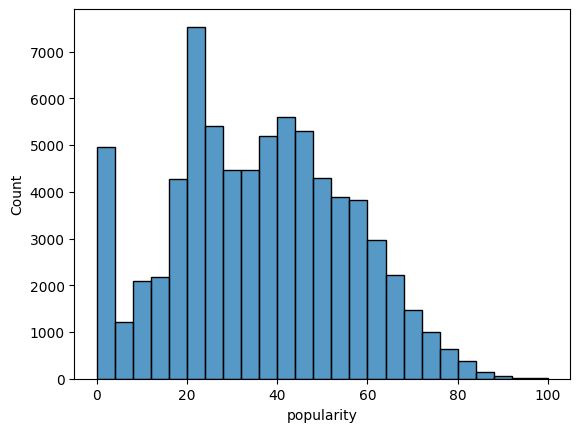

In [34]:
sns.histplot(data = song_df_gr, x = 'popularity', bins = 25)

In [35]:
song_df_gr[song_df_gr['popularity']==0].shape #after having grouped by track_name the number of zero-popularuty songs has decreased from 15843 to 4007

(4007, 63)

In [36]:
zero_popularity = song_df_gr[song_df_gr['popularity']==0]    #choose songs with 0 popularity
non_zero_popularity = song_df_gr[song_df_gr['popularity']!=0] #choose songs with non-zero popularity


sampled_zero_popularity = zero_popularity.sample(frac=0.1, random_state=42)

df_resampled = pd.concat([non_zero_popularity, sampled_zero_popularity])

 By using pandas method - .sample(), I reduced the number of these zero-popularity entries to achieve more balanced dataset. This is important for further statistical analyses and more balanced distribution of classes.

<Axes: xlabel='popularity', ylabel='Count'>

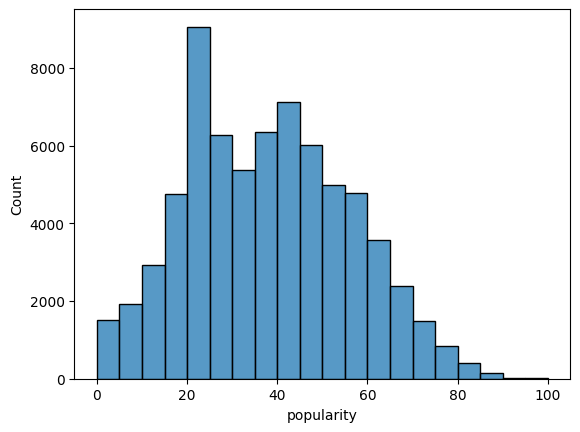

In [37]:
sns.histplot(data = df_resampled, x = 'popularity', bins = 20)

Now the spike at the beginning of the histogram is handled, the destribution of the popularity after sampling looks closer to normal bell-shaped destribution.

In [38]:
df_resampled #Now the dataframe looks like this

,track_id,artists,popularity,duration_ms,danceability,energy,loudness,speechiness,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre_acoustic,track_genre_alt-rock,track_genre_alternative,track_genre_ambient,track_genre_blues,track_genre_brazil,track_genre_chill,track_genre_classical,track_genre_country,track_genre_dance,track_genre_disco,track_genre_dubstep,track_genre_edm,track_genre_electro,track_genre_electronic,track_genre_folk,track_genre_french,track_genre_funk,track_genre_gospel,track_genre_hip-hop,track_genre_house,track_genre_indie,track_genre_jazz,track_genre_k-pop,track_genre_latin,track_genre_metal,track_genre_new-age,track_genre_opera,track_genre_party,track_genre_piano,track_genre_pop,track_genre_punk,track_genre_r-n-b,track_genre_reggae,track_genre_rock,track_genre_romance,track_genre_salsa,track_genre_samba,track_genre_singer-songwriter,track_genre_ska,track_genre_soul,track_genre_spanish,track_genre_synth-pop,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_world-music
track_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
!I'll Be Back!,0fROT4kK5oTm8xO8PX6EJF,Rilès,52,178533,0.823,0.6120,-7.767,0.2480,1,1,0.2480,0.1680,0.000000,0.1090,0.6880,142.959,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""A"" You're Adorable",1hH0t381PIXmUVWyG1Vj3p,Brian Hyland,39,151680,0.615,0.3750,-10.362,0.0319,0,0,0.0319,0.4820,0.000000,0.1110,0.9220,110.720,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""C"" IS FOR COOKIE",1B45DvGMoFWdbAEUH2qliG,Little Apple Band,32,84305,0.553,0.8120,-5.542,0.0558,3,1,0.0558,0.1320,0.000010,0.0794,0.8710,118.368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""C"" is for Cookie",73lXf5if6MWVWnsgXhK8bd,Little Apple Band,8,86675,0.664,0.6110,-8.687,0.0886,3,1,0.0886,0.1200,0.000000,0.0408,0.7580,118.443,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"""Contemplate This on the Tree of Woe.""",5Zx0Rrkn5RFBMD2PRxX3mI,Dillinger Four,24,180706,0.565,0.9770,-3.592,0.0546,11,1,0.0546,0.0282,0.001320,0.4330,0.3870,106.478,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Мы молодой рабочий класс,6ZefnGpfihXy0R2zA5w1Vf,Владимир Бунчиков,0,168111,0.416,0.6680,-10.081,0.0461,2,0,0.0461,0.9530,0.000015,0.8080,0.6780,118.500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Cosas Nativas,7N2IQ5jhSXuQjgCUF2kiTi,Tommy Olivencia,0,333360,0.589,0.6850,-6.324,0.0560,7,0,0.0560,0.4180,0.131000,0.0839,0.9300,166.088,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Techno Cumbia,76J20zoYp7GK7C6YahOM8V,Selena,0,225720,0.638,0.7480,-6.337,0.0751,6,1,0.0751,0.3400,0.000005,0.0541,0.9510,181.958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


reading newly formed dataframe df_resampled

In [39]:
df_resampled.describe()

,popularity,duration_ms,danceability,energy,loudness,speechiness,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre_acoustic,track_genre_alt-rock,track_genre_alternative,track_genre_ambient,track_genre_blues,track_genre_brazil,track_genre_chill,track_genre_classical,track_genre_country,track_genre_dance,track_genre_disco,track_genre_dubstep,track_genre_edm,track_genre_electro,track_genre_electronic,track_genre_folk,track_genre_french,track_genre_funk,track_genre_gospel,track_genre_hip-hop,track_genre_house,track_genre_indie,track_genre_jazz,track_genre_k-pop,track_genre_latin,track_genre_metal,track_genre_new-age,track_genre_opera,track_genre_party,track_genre_piano,track_genre_pop,track_genre_punk,track_genre_r-n-b,track_genre_reggae,track_genre_rock,track_genre_romance,track_genre_salsa,track_genre_samba,track_genre_singer-songwriter,track_genre_ska,track_genre_soul,track_genre_spanish,track_genre_synth-pop,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_world-music
count,70002.000000,7.000200e+04,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.00000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000,70002.000000
mean,37.506886,2.352910e+05,0.566986,0.651040,-8.343664,0.093785,5.436902,0.650039,0.093785,0.336761,0.193422,0.231089,0.478822,123.675720,0.012771,0.009571,0.007486,0.01260,0.009214,0.013642,0.012814,0.007828,0.006028,0.005914,0.010385,0.012771,0.008614,0.008428,0.013242,0.011128,0.012985,0.010114,0.013600,0.009557,0.008314,0.010028,0.004814,0.012700,0.005086,0.010828,0.013471,0.011971,0.010057,0.011871,0.010428,0.011857,0.011657,0.006843,0.006543,0.005543,0.012414,0.013242,0.010357,0.013328,0.006043,0.012385,0.011571,0.012971,0.012500,0.013157,0.012928
std,18.051479,1.207082e+05,0.177377,0.254236,5.169234,0.122900,3.569724,0.476961,0.122900,0.339143,0.337704,0.206199,0.263650,30.358584,0.112286,0.097364,0.086195,0.11154,0.095547,0.116002,0.112472,0.088132,0.077409,0.076676,0.101379,0.112286,0.092412,0.091419,0.114312,0.104903,0.113212,0.100059,0.115823,0.097292,0.090802,0.099639,0.069217,0.111976,0.071132,0.103495,0.115281,0.108756,0.099779,0.108307,0.101586,0.108242,0.107336,0.082437,0.080622,0.074243,0.110725,0.114312,0.101241,0.114677,0.077500,0.110599,0.106946,0.113150,0.111102,0.113947,0.112966
min,0.000000,2.426600e+04,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.760092e+05,0.456000,0.477000,-10.126750,0.036600,2.000000,0.000000,0.036600,0.017900,0.000000,0.101000,0.261000,100.016000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [40]:
df_resampled.shape

(70002, 63)

# Correlation matrix

Correlation matrices are essential in Exploratory Data Analysis (EDA), offering valuable insights into relationships between variables, assisting in feature selection, detecting patterns, validating assumptions, ensuring data quality, and facilitating visual exploration of data patterns.

In [41]:
numeric_song_df = df_resampled.select_dtypes(include=['int', 'float'])

In [42]:
numeric_song_df.corr()

,popularity,duration_ms,danceability,energy,loudness,speechiness,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre_acoustic,track_genre_alt-rock,track_genre_alternative,track_genre_ambient,track_genre_blues,track_genre_brazil,track_genre_chill,track_genre_classical,track_genre_country,track_genre_dance,track_genre_disco,track_genre_dubstep,track_genre_edm,track_genre_electro,track_genre_electronic,track_genre_folk,track_genre_french,track_genre_funk,track_genre_gospel,track_genre_hip-hop,track_genre_house,track_genre_indie,track_genre_jazz,track_genre_k-pop,track_genre_latin,track_genre_metal,track_genre_new-age,track_genre_opera,track_genre_party,track_genre_piano,track_genre_pop,track_genre_punk,track_genre_r-n-b,track_genre_reggae,track_genre_rock,track_genre_romance,track_genre_salsa,track_genre_samba,track_genre_singer-songwriter,track_genre_ska,track_genre_soul,track_genre_spanish,track_genre_synth-pop,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_world-music
popularity,1.000000,-0.039696,0.119492,0.002059,0.111121,-0.063474,0.043833,0.016568,-0.063474,0.024568,-0.164454,-0.029046,0.044024,0.022849,0.069096,0.102929,0.096315,0.071915,0.066319,0.058137,0.130489,-0.067335,0.036519,0.095843,0.039362,0.066939,0.120689,0.126836,0.075011,0.069179,0.052002,0.052422,0.029998,0.115779,0.127489,0.104318,0.023463,0.138828,-0.002631,0.130563,-0.027466,-0.046925,-0.046302,0.096134,0.164420,0.061036,0.048619,0.039428,0.085691,-0.116502,-0.036040,0.015508,0.092633,0.000352,0.066839,0.035680,0.035604,0.046320,0.035127,0.004925,0.037649
duration_ms,-0.039696,1.000000,-0.035822,0.069309,0.019783,-0.054724,0.029502,-0.023547,-0.054724,-0.087944,0.115675,0.017254,-0.122070,0.036207,-0.005536,0.013512,0.007760,0.014569,0.010513,0.041824,-0.040851,0.004266,-0.005341,-0.006311,0.017103,0.010704,-0.010103,-0.013590,0.008609,0.039414,-0.011869,-0.009000,0.078439,-0.012198,-0.009543,-0.009018,0.004727,0.028033,-0.007750,0.031056,0.074147,0.004030,-0.025240,-0.013013,0.001690,-0.009603,-0.007332,-0.006172,0.006584,-0.015694,0.039728,-0.004127,-0.003236,-0.009633,0.002899,0.003084,0.015046,0.081230,0.047537,0.047628,0.065784
danceability,0.119492,-0.035822,1.000000,0.130693,0.266640,0.118103,0.060350,-0.037799,0.118103,-0.116500,-0.156410,-0.120296,0.496491,0.005566,0.011208,0.003150,0.015107,-0.096699,0.012824,0.001635,0.073753,-0.076731,0.010722,0.060142,0.071863,0.003042,0.057846,0.059341,0.067119,0.011572,0.063015,0.090734,-0.056457,0.083919,0.066851,0.026266,0.005342,0.053968,0.064876,-0.031066,-0.113978,-0.135827,0.062950,-0.045683,0.045720,-0.029427,0.035289,0.078542,0.010643,-0.049117,0.067534,0.009662,0.019319,0.014223,0.041108,0.024937,0.039301,0.082675,0.016396,0.054338,-0.087730
energy,0.002059,0.069309,0.130693,1.000000,0.757325,0.144958,0.065994,-0.050194,0.144958,-0.674963,-0.154183,0.197980,0.256067,0.270668,-0.055782,0.047264,0.038413,-0.145487,-0.002475,-0.007462,-0.066381,-0.141870,0.002217,0.030075,0.045738,0.063625,0.046508,0.020040,0.031348,-0.026526,-0.006717,0.000794,-0.030436,0.025939,0.046510,-0.033960,-0.047301,0.018314,0.026404,0.081402,-0.161155,-0.130566,0.084873,-0.115598,-0.005181,0.073970,0.002663,0.021927,0.023490,-0.094472,0.034246,0.014255,-0.070548,0.070956,-0.007335,0.028886,0.037224,0.051918,0.091917,0.001180,-0.042938
loudness,0.111121,0.019783,0.266640,0.757325,1.000000,0.058910,0.058536,-0.016990,0.058910,-0.526857,-0.394919,0.088035,0.294494,0.248102,-0.000947,0.046764,0.045883,-0.181668,0.013796,0.022499,-0.026037,-0.169422,0.021142,0.049491,0.028459,0.080405,0.060457,0.047735,0.035484,-0.002465,0.005278,0.048326,0.029415,0.047102,0.059391,0.001199,-0.019090,0.042967,0.046793,0.064387,-0.185224,-0.105123,0.075735,-0.157846,0.032495,0.060929,0.021776,0.043234,0.033241,-0.061154,0.034294,0.001773,-0.020742,0.051094,0.020309,0.041064,0.016629,0.015760,0.047831,-0.008674,-0.021871
speechiness,-0.063474,-0.054724,0.118103,0.144958,0.058910,1.000000,0

<Axes: >

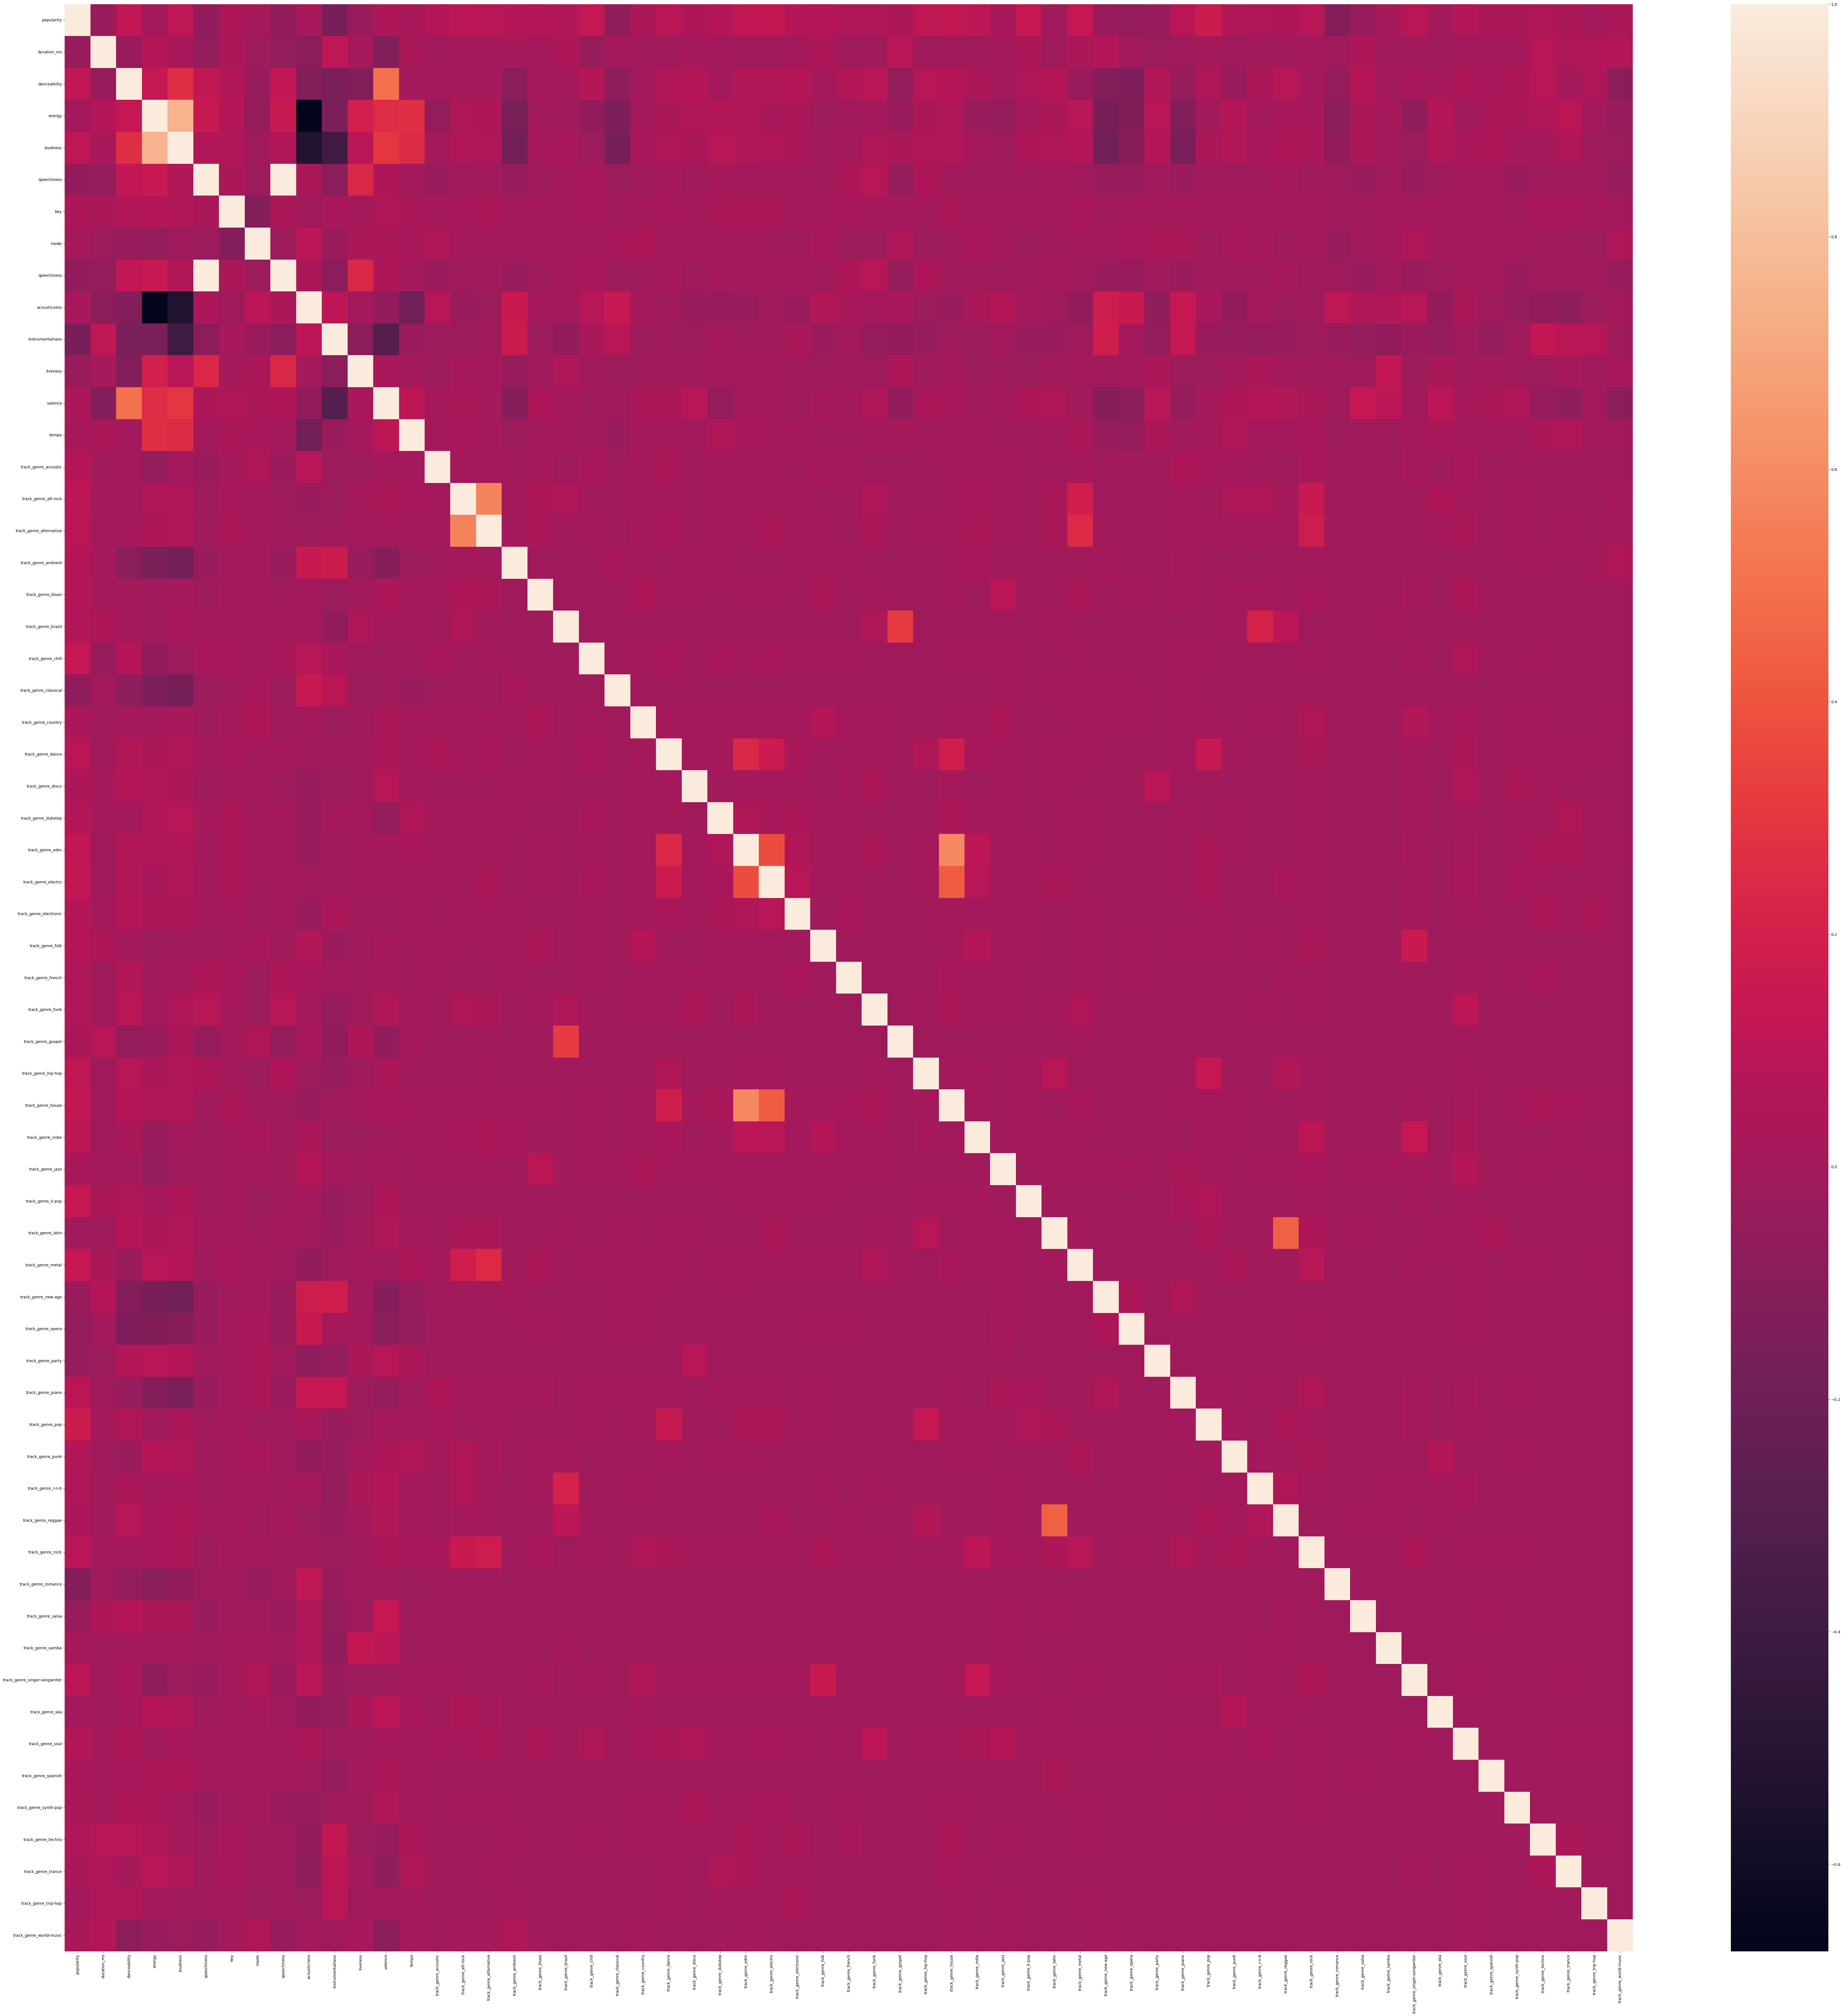

In [43]:
corr_matrix = numeric_song_df.corr()

plt.figure(figsize= (90,90))
sns.heatmap(corr_matrix)

This matrix shows the correlation between variables. It was expected that there would be stonger corelation and more relationships between variables in dataset. Further visualisation demonstrates the relationships between different variables with moderate, negative, positive correlation.

# Visualisation

The importance of different plots lies in their ability to reveal patterns, relationships, distributions, and anomalies in data, facilitating data exploration, analysis, and communication of findings.

From Kaggle column discribtion:
*   **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
*   **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable


<Axes: xlabel='valence', ylabel='danceability'>

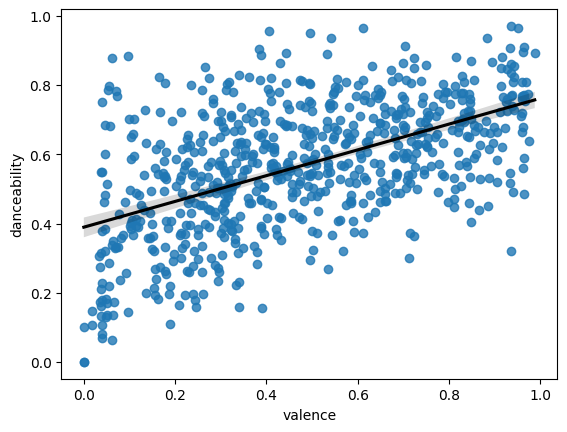

In [44]:
sns.regplot(x='valence', y='danceability', data=df_resampled[::100], line_kws= {'color': 'black'})

The correlation coefficient of 0.496490 between "valence" and "danceability", and plot above as well suggest a moderate positive relationship between these variables. This means that, on average, tracks with higher valence tend to have higher danceability, and vice versa. In other words, tracks with a more positive emotional tone (higher valence) are generally more suitable for dancing (higher danceability). This correlation aligns with intuition that upbeat, cheerful music often tends to be more danceable.

<Axes: xlabel='popularity'>

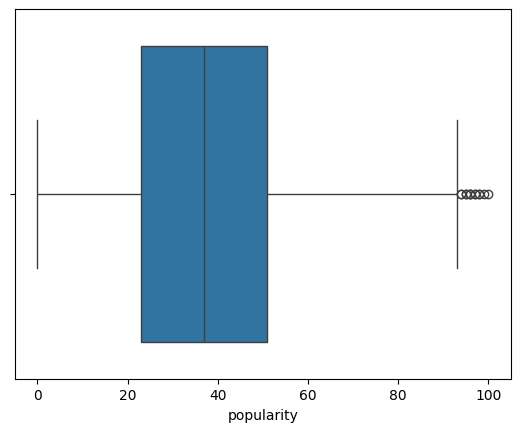

In [45]:
sns.boxplot(df_resampled, x = 'popularity')

In [46]:
df_resampled.popularity.describe()

count    70002.000000
mean        37.506886
std         18.051479
min          0.000000
25%         23.000000
50%         37.000000
75%         51.000000
max        100.000000
Name: popularity, dtype: float64

From Kaggle column description:


*   **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
*   **loudness:** The overall loudness of a track in decibels (dB)



<Axes: xlabel='energy', ylabel='loudness'>

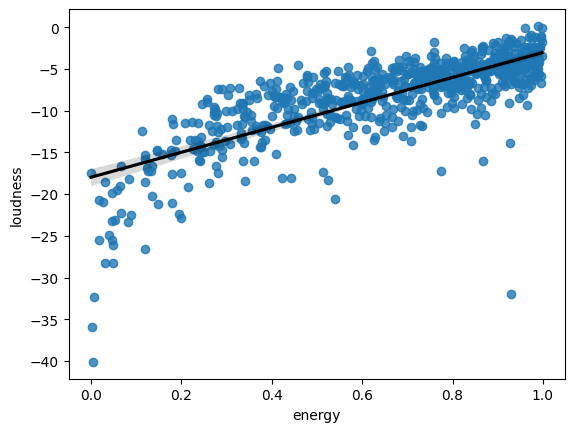

In [47]:
sns.regplot(x='energy', y='loudness', data=df_resampled[::100],  line_kws={"color": "black"})

The plot shows positive relationship between these variables. This means that tracks with higher energy tend to have higher loudness, and vice versa. In other words, energetic tracks, which feel fast, loud, and noisy, typically exhibit higher loudness levels.


Understanding this relationship can be valuable for example, in music recommendation systems. It can help enhance personalized recommendations by taking into account the energetic and loudness preferences of users.



* **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
*   **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

<Axes: xlabel='acousticness', ylabel='energy'>

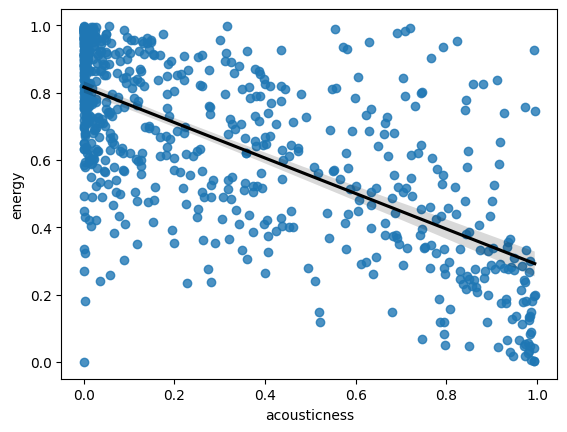

In [48]:
sns.regplot(x='acousticness', y='energy', data=df_resampled[::100],  line_kws={"color": "black"})

This plot tells that tracks that are more acoustic in nature are likely to be performed on acoustic instruments or having minimal electronic processing, tend to have lower energy levels. So, we can assume that energetic songs are equipped with various sound effects to increase the volume, noise, etc.

<Axes: xlabel='track_genre', ylabel='popularity'>

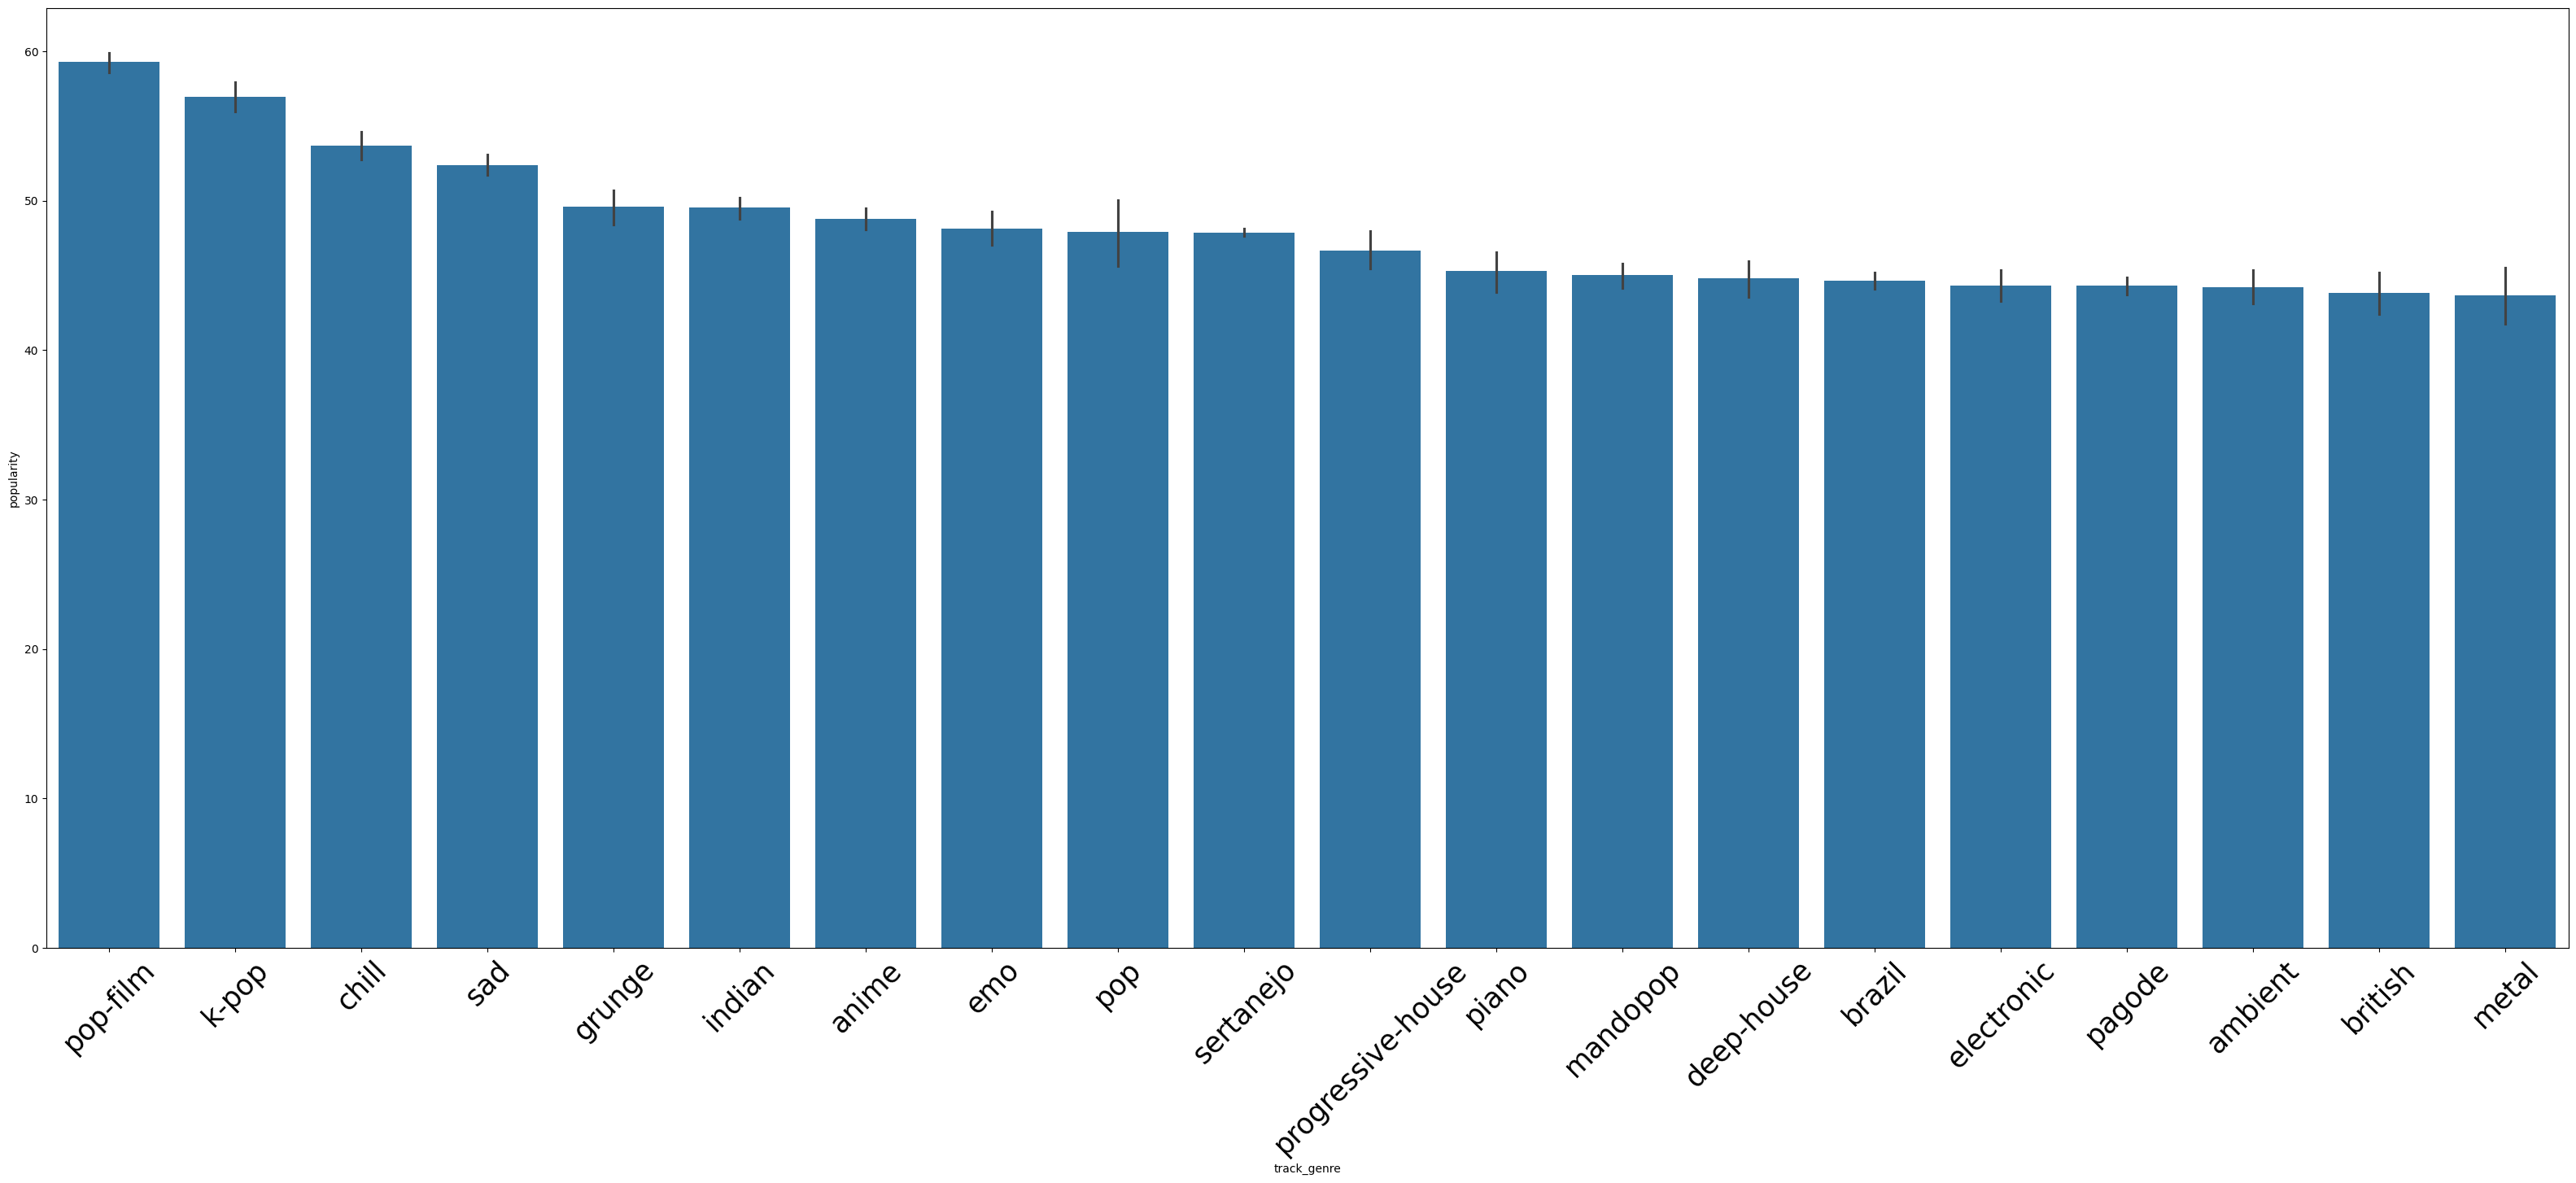

In [49]:

genre_popularity = song_df.groupby('track_genre').agg({'popularity': 'mean'})



sorted_genre_popularity = genre_popularity.sort_values(by='popularity', ascending=False).head(20)

sorted_genre_popularity
sorted_genres = sorted_genre_popularity.index.tolist()

plt.figure(figsize=(40,15))
plt.xticks(rotation=45, fontsize=25)
sns.barplot(data=song_df, x='track_genre', y='popularity', order=sorted_genres)

In [50]:
genre_popularity.sort_values(by='popularity', ascending=False)

,popularity
track_genre,
pop-film,59.280280
k-pop,56.963928
chill,53.704705
sad,52.379000
grunge,49.582583
indian,49.528529
anime,48.766767
emo,48.128000
pop,47.903323


This plot shows that the most popular genres (by average popularity) are
*  pop-film	59.280280
*  k-pop	56.963928
*  chill	53.704705

The least popular is "Iranian," which is not gaining popularity, perhaps due to limited exposure and understanding.